## Loan Prediction Classifier

### Table of Contents

1. Motivation
2. Import libraries and dataset
3. Exploratory data anaylsis
    * Preprocessing data types
4. Building the Model
    * Evaluating Model Failures
5. Conclusion

### Motivation
Motivation: the goal of the project is to build a loan prediction classifier to determine whether or not someone will be approved for a home loan (yes/no). This project uses the loan prediction data set found here: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

### Import Libraries and dataset

For this project I am using the Pandas library to manipulate the dataset as a dataframe. I also use the Seaborn and Matplotlib libraries in my exploratory analsysis to visualize the data. Lastly I use the Scikit learn libraries to build my classification model.

In [1]:
#Import Libraries 
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
# Load test and train data set from the Loan Prediction data set
# We generally use training datasets to build models and then deploy our models on the test dataset as a way
# to reduce overfitting our models and provide the model with never before seen data

loan_test = pd.read_csv(r"C:\Users\nmani\OneDrive\Desktop\loan-test.csv")
loan_train = pd.read_csv(r"C:\Users\nmani\OneDrive\Desktop\loan-train.csv")


### Exploratory Analysis

It is important to understand what data is available in the dataset (and what is not). Some of the things we want to understand include the size, shape, and distributions of dataset and its features. Once we have a fundamental understanding of the data we also want to prepare the data to be able to effectively use the statisical models.

In [3]:
loan_train.head() #looking at the top 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Column Variables Descriptions
* Loan_ID -->	Unique Loan ID
* Gender	--> Male/ Female
* Married --> Applicant married (Y/N)
* Dependents -->	Number of dependents
* Education --> Applicant Education (Graduate/ Under Graduate)
* Self_Employed --> Self-employed (Y/N)
* ApplicantIncome --> Applicant income
* CoapplicantIncome --> Coapplicant income
* LoanAmount -->	Loan amount in thousands
* Loan_Amount_Term --> Term of a loan in months
* Credit_History -->	credit history meets guidelines (1/0)
* Property_Area --> Urban/ Semi-Urban/ Rural
* Loan_Status --> Loan approved (Y/N)

Taking a look at the type of data with .describe and the null values of both the training and test datasets. Null values can be dealt with in variety of ways depending on the size or type of the dataset.

In [4]:
loan_train.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


.describe() gives us a good sense of what the range of values are in the dataset. training dataset has values .842 meaning it is not binary?

In [5]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

How big is our dataset? The shape of our dataset influences decisions made later on including dealing with null values and what type of model we select (how many rows we have relative to our features)

In [7]:
loan_train.shape

(614, 13)

In [8]:
loan_test.shape

(367, 12)

In [9]:
loan_train.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Missing data

Our dataset is relatively small it would not make sense to throw away all of the incomplete rows. There are a few ways of dealing with missing data.
1. Assuming no relationships amoung the features. We can just fill the missing values with the mean or mode of the column depending on the data's type, I use this method in my analysis but one issue I forsee is using the mode to fill the gender column, the majority of the dataset male all missing values will also be male.
2. Assume some relationships amoung the features. For example it might be true that those with dependents are more likely married than those without dependents. We could use another classifier for this problem such as K-Nearest Neighbors (future analysis)

In [10]:
#copying test and train data set to avoid manipulating source data too far
test = loan_test.copy()
train = loan_train.copy()

In [11]:
#Replacing nan and na values with mean and mode
#Only adjusting the training dataset to prevent overfitting of the test set

#Categorical features are adjusted with .mode()
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

train['Married'].fillna(train['Married'].mode()[0],inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

#Qualitative features are adjusted with .mean()
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)


In [12]:
#Encoding Categorical Variables
#Replacing categorical variables with binary selection to be used when building our models
replacements = {'Yes':1, 'No':0, 'Y':1,'N':0,'Male':1,'Female':0,'Graduate':1,'Not Graduate':0}

train.Loan_Status = train.Loan_Status.replace(replacements)

train.Gender = train.Gender.replace(replacements)
test.Gender = test.Gender.replace(replacements)

train.Married = train.Married.replace(replacements)
test.Married = test.Married.replace(replacements)

train.Self_Employed = train.Self_Employed.replace(replacements)
test.Self_Employed = test.Self_Employed.replace(replacements)

train.Education = train.Education.replace(replacements)
test.Education = test.Education.replace(replacements)


For dependents features we see that '3+' is not a value that fits well with models. Using scikit's labelEncoder we adjust the values to make them useable

In [13]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [14]:
le = LabelEncoder()
train['Dependents'] = le.fit_transform(train['Dependents'])
test['Dependents'] = le.fit_transform(test['Dependents'])
train['Dependents'].unique()

array([0, 1, 2, 3])

In [15]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

One hot encoding categorical feature 'Property_Area'. The feature takes on 3 values Semiurban, Urban, and Rural. We can introduce 2 new columns, 'is_semiurban' yes:1 no:0 and 'is_urban' yes:1 no:0. if both values are 0 then property area is rural. We use One hot coding method instead of the same enodcoing method from earlier to avoid introducing unnecessary relationships. Scikit learn also has a OneHotEncoding Method

In [16]:
test['is_semiurban'] = test['Property_Area'].apply(lambda x: 1 if x == 'Semiurban' else 0)
test['is_urban'] = test['Property_Area'].apply(lambda x: 1 if x =='Urban' else 0)

train['is_semiurban'] = train['Property_Area'].apply(lambda x: 1 if x == 'Semiurban' else 0)
train['is_urban'] = train['Property_Area'].apply(lambda x: 1 if x =='Urban' else 0)


In [17]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,is_semiurban,is_urban
0,LP001015,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,Urban,0,1
1,LP001022,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,Urban,0,1
2,LP001031,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,Urban,0,1
3,LP001035,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,Urban,0,1
4,LP001051,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,Urban,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3,0,1.0,4009,1777,113.0,360.0,1.0,Urban,0,1
363,LP002975,1.0,1,0,1,0.0,4158,709,115.0,360.0,1.0,Urban,0,1
364,LP002980,1.0,0,0,1,0.0,3250,1993,126.0,360.0,NaN,Semiurban,1,0
365,LP002986,1.0,1,0,1,0.0,5000,2393,158.0,360.0,1.0,Rural,0,0


Now that the data is adjusted we can continue our exploratory analysis. I look at the distributions of the test and train dataset features to ensure that our model will be tested on a relevant dataset. For example we look at the 'ApplicantIncome' feature in both dataframes and see that the distributions of incomes are similar. If one data set had very high applicant incomes while the other had lower incomes our model may not be able to adjust for that with the given information.

In [18]:
train['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

With the values of loan status being as is how does this affect our model? where we have more yes observations than no?

<Axes: xlabel='Loan_Status'>

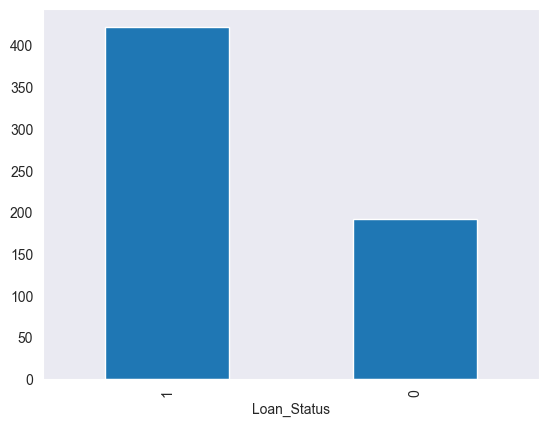

In [19]:
train['Loan_Status'].value_counts().plot.bar()

In [20]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
 13  is_semiurban       614 non-null    int64  
 14  is_urban           614 non-null    int64  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 69.7+ KB


<Axes: >

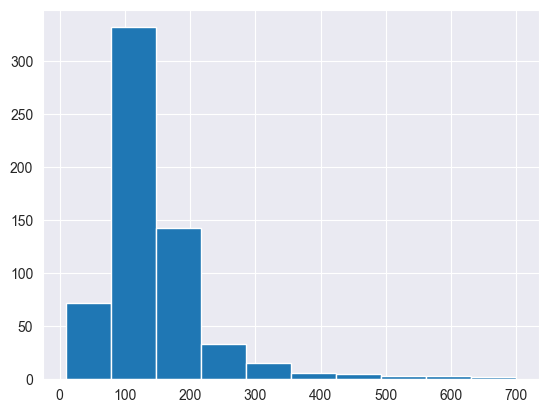

In [21]:
#Why is it important to look at the distributions

train['LoanAmount'].hist(bins=10)

<Axes: >

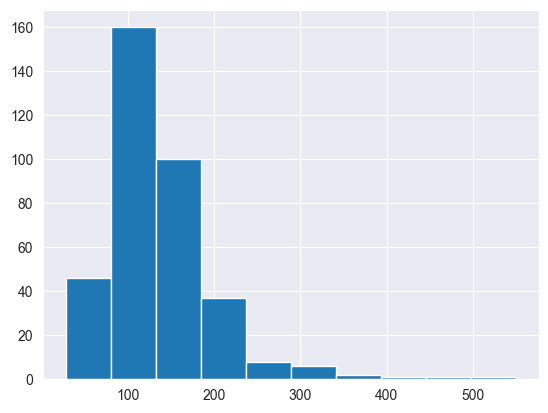

In [22]:
test['LoanAmount'].hist(bins=10)

<Axes: >

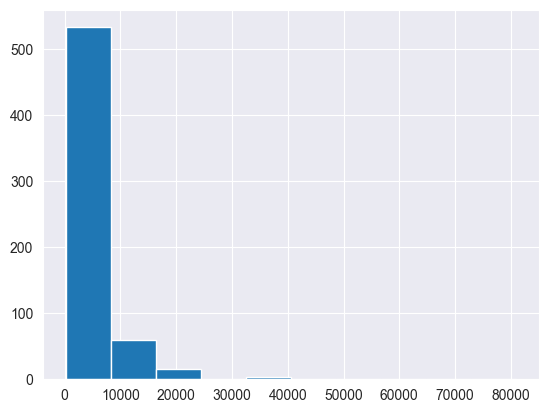

In [23]:
train['ApplicantIncome'].hist(bins=10)

<Axes: >

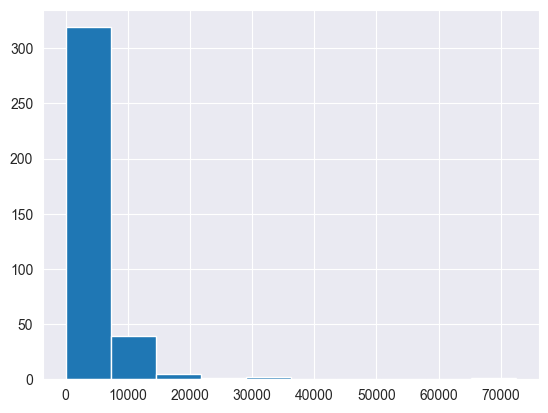

In [24]:
#how similar are the train and test sets
test['ApplicantIncome'].hist(bins=10)

In [25]:
train = train.drop(['Loan_ID','Property_Area'],axis=1)

We can look at how the features are related to eachother and the 'Loan_Status using correlations and heatmaps

In [26]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,0.017987,-0.108623,0.034530
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.091478,0.005845,0.000546
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,0.010118,0.001924,-0.001198
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.077936,0.085884,0.039410,0.034279
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.003700,0.008710,-0.030338
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710,-0.014246,-0.000598
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187,-0.027044,0.022776
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416,-0.008273,-0.033220
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974,0.061365,-0.096683
Credit_History,0.012819,0.005852,-0.037392,0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483,0.040757,-0.022621


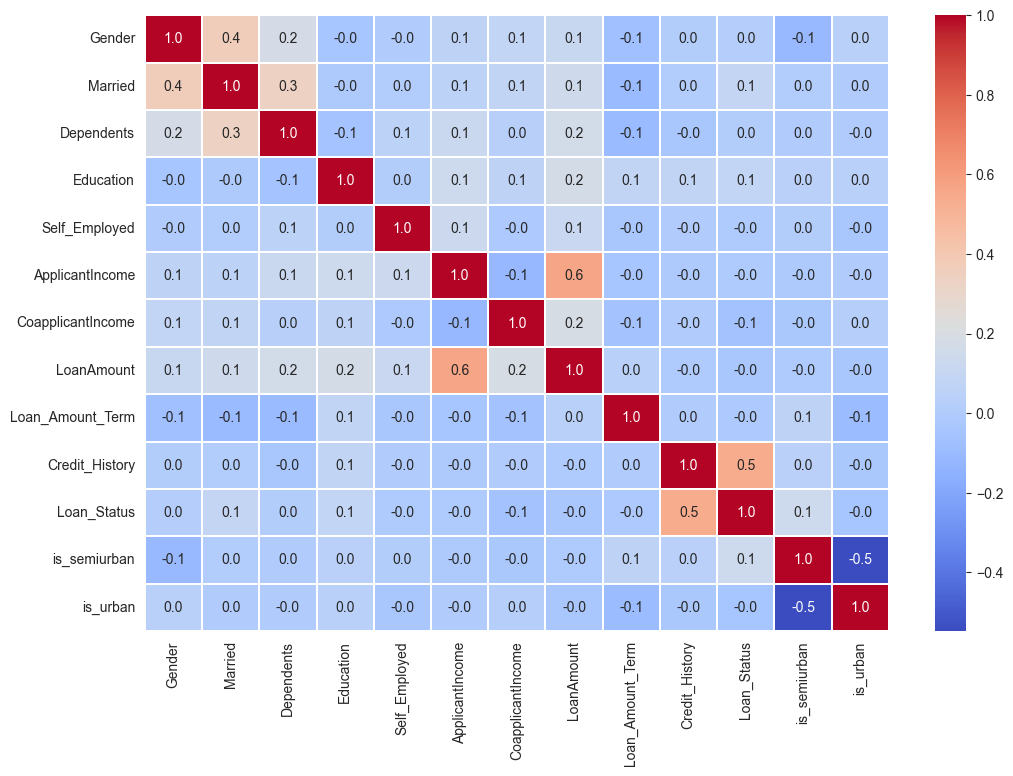

In [27]:
#Easier to read heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

From the heatmap we can see that credit history has the greatest impact on whether or not a loan will be approved.

<Axes: >

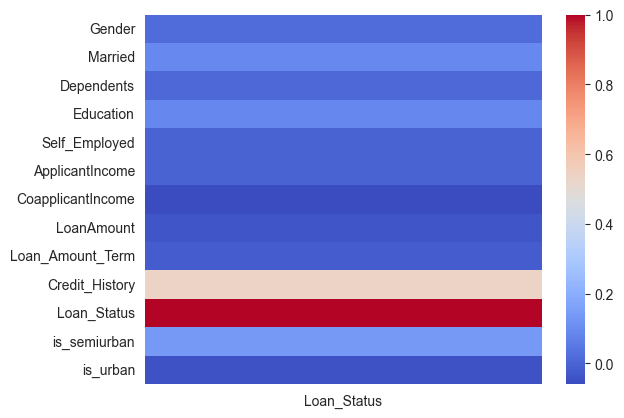

In [28]:
temp = train.corr()

temp = temp[['Loan_Status']]
sns.heatmap(temp,cmap='coolwarm')

In [29]:
temp = train.groupby(['Loan_Status','Gender']).size()
temp

Loan_Status  Gender
0            0          37
             1         155
1            0          75
             1         347
dtype: int64

In [30]:
ml = len(train[(train['Gender']==1) & (train['Loan_Status']==1)])
fl = len(train[(train['Gender']==0) & (train['Loan_Status']==1)])
md = len(train[(train['Gender']==1) & (train['Loan_Status']==0)])
fd = len(train[(train['Gender']==0) & (train['Loan_Status']==0)])

In [31]:
#What are Males and Females Loan statuses in relationship to the same gender
md_pct = (md/(ml+md)) * 100
fd_pct = (fd/(fd+fl)) * 100
ml_pct = (ml/(ml+md)) * 100
fl_pct = (fl/(fd+fl)) * 100
print(f'Males are denied {round(md_pct,2)} % of the times, Females are denied {round(fd_pct,2)} % of the time')
print(f'Males are accepted {round(ml_pct,2)} % of the times, Females are accepted {round(fl_pct,2)} % of the time')

Males are denied 30.88 % of the times, Females are denied 33.04 % of the time
Males are accepted 69.12 % of the times, Females are accepted 66.96 % of the time


we see that males and females are denied and accepted at realivelty the same rates

In [32]:
temp = train.groupby(['Loan_Status','Married'])['Loan_Status'].count()
temp

Loan_Status  Married
0            0           79
             1          113
1            0          134
             1          288
Name: Loan_Status, dtype: int64

In [33]:
mrl = len(train[(train['Married']==1) & (train['Loan_Status']==1)])
uml = len(train[(train['Married']==0) & (train['Loan_Status']==1)])
mrd = len(train[(train['Married']==1) & (train['Loan_Status']==0)])
umd = len(train[(train['Married']==0) & (train['Loan_Status']==0)])

In [34]:
#What is the Loan status based on marital status
md_pct = (mrd/(mrl+mrd)) * 100
ud_pct = (umd/(uml+umd)) * 100
ml_pct = (mrl/(mrl+mrd)) * 100
ul_pct = (uml/(uml+umd)) * 100
print(f'Married people are denied {round(md_pct,2)} % of the times, unmarried people are denied {round(ud_pct,2)} % of the time')
print(f'Married people are accepted {round(ml_pct,2)} % of the times, unmarried people are accepted {round(ul_pct,2)} % of the time')


Married people are denied 28.18 % of the times, unmarried people are denied 37.09 % of the time
Married people are accepted 71.82 % of the times, unmarried people are accepted 62.91 % of the time


Married people are more likely to be accepted for loans than unmarried people. This could be for a variety of reasons including that Married couples have 2 incomes.

In [35]:
temp = train.groupby(['Loan_Status','Education'])['Loan_Status'].count()
temp

Loan_Status  Education
0            0             52
             1            140
1            0             82
             1            340
Name: Loan_Status, dtype: int64

In [36]:
gl = len(train[(train['Married']==1) & (train['Loan_Status']==1)])
ugl = len(train[(train['Married']==0) & (train['Loan_Status']==1)])
gd = len(train[(train['Married']==1) & (train['Loan_Status']==0)])
ugd = len(train[(train['Married']==0) & (train['Loan_Status']==0)])

In [37]:
#What is the Loan status based on education
gd_pct = (gd/(gl+gd)) * 100
ugd_pct = (ugd/(ugl+ugd)) * 100
gl_pct = (gl/(gl+gd)) * 100
ugl_pct = (ugl/(ugl+ugd)) * 100
print(f'Graduates denied {round(gd_pct,2)} % of the times, non graduates are denied {round(ud_pct,2)} % of the time')
print(f'Graduates accepted {round(gl_pct,2)} % of the times, non graduates are accepted {round(ul_pct,2)} % of the time')
#interesting that the rate of graduates are denied more than non graduates

Graduates denied 28.18 % of the times, non graduates are denied 37.09 % of the time
Graduates accepted 71.82 % of the times, non graduates are accepted 62.91 % of the time


We see that graduates are acceptted for loans at a greater rate than non graduates. This follows the intuition that graduates earn more money on average than non graduates and are therefore more likely to repay loans.

From exploratory analysis best factors to include would be credit history, martial status, loan ammount, and applicant income. From the confusion matrix it seems as though the Loan amount and Applicant income might have some collinearity

### Building Our Model

For our baseline model we will attempt to use a logistic regression model. Logistic regression acts as a classification model by calculating the probability that the event (loan_status) will occur. The model will out put the results as the event will occur or not (yes/no).

The Scikit learn logisitic regression function can take in a varity of features including
1. max_iter, how many iterations are need for the algorithm to converge the default is 100 but may need more depending on features and rows
2. solver, 'lbfgs' is the default but what solver you can choose will depend on the type and shape of the data you are working with
3. penalty, what type of penalty would like to include based on your solver, l2 is the default. the penalty corrects for the scale of the data and how many features you want to include in the model.

In [38]:
#Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

In [39]:
#We need to scale our features being used to reduce the penalty incurred by the model
#Using scikit learns standard scaler method on the features
#Only scalling continuous features
features = ['LoanAmount','ApplicantIncome']
scaler_train = preprocessing.StandardScaler().fit(train[features].values)
scalled_train = pd.DataFrame(data=scaler_train.transform(train[features].values))


In [40]:
scalled_train.columns = ["scalled_LoanAmount","scalled_ApplicantIncome"]


In [41]:
#creating a new data frame with only the features and loan status for the model
df_model = pd.concat([train,scalled_train],axis=1)

In [42]:
df_model

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1,0.000000,0.072991
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0,-0.219273,-0.134412
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1,-0.957641,-0.393747
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1,-0.314547,-0.462062
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1,-0.064454,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,0,0,-0.898095,-0.410130
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,0,0,-1.267279,-0.212557
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,0,1,1.269371,0.437174
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1,0.483367,0.357064


In [43]:
model_features = ['Credit_History','Married','scalled_LoanAmount','scalled_ApplicantIncome']

In [44]:
#Splitting our dataset to be able to run test.
training_data, testing_data = train_test_split(df_model, test_size=0.3, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 429
No. of testing examples: 185


In [45]:
#loading the data into x_train,y_train,x_test,y_test

x_train = training_data[model_features].values
y_train = training_data['Loan_Status'].values
x_test = testing_data[model_features].values
y_test = testing_data['Loan_Status'].values

In [46]:
#Results
logistic_model.fit(x_train, y_train)
print('Intercept of model',logistic_model.intercept_)
print('Coefficient of model :', logistic_model.coef_)

score_train = logistic_model.score(x_train, y_train)
print('accuracy_score overall when tested on the training set:', score_train)

score_test = logistic_model.score(x_test, y_test)
print('accuracy_score overall when tested on the testing set :', score_test)

Intercept of model [-2.20834647]
Coefficient of model : [[ 3.18322884  0.54111729 -0.01243066  0.03280247]]
accuracy_score overall when tested on the training set: 0.8065268065268065
accuracy_score overall when tested on the testing set : 0.8162162162162162


Our logistic regression model had an accuracy score of 80.9% when tested against the training dataset and 81.6% when tested against testing data set. The Intercept of the model(Bo): -2.36 represents that if all other coefficents where equal to zero the log odds of a loan being accepted are -2.36 (loan will not be accepted). The coefficients of the model 3.37, 0.54, -0.17, .101 repressent the importance of each of the features used in the model; Credit History, Marital Status, Scalled Loan Amount, and Scalled Applicant Income repsectively. Our model follows our findings in our exploratory analysis that Credit History plays the biggest role in determining the loan status with a coefficient of 3.37. As a binary feature the coefficent is included when applicant has history and not included when they have no history. Likewise Marital Status is also a binary feature and the coefficient 0.54 will only be used in the log odds when applicant is married. The feature Scalled Loan Amount has a coeffienct of -0.17 meaning that for every 1 point increase in the Scalled Loan Amount the log odds of getting a loan decrease by 0.17. This follows the intuition that larger loans are riskier and likely harder to pay back. The last coefficent Scalled Applicant Income is similar such that for every 1 point increase in the Scalled Applicant Income the log odds of getting a loan increase by 0.10.


In [47]:
#building data frame with predictions for each entry based on our model
temp = pd.DataFrame(data=logistic_model.predict(x_test),columns=['model_status'])
temp2 = pd.DataFrame(data=logistic_model.predict_proba(x_test),columns=['denied%','approved%'])
temp.reset_index(drop=True, inplace=True)
temp2.reset_index(drop=True, inplace=True)
testing_data.reset_index(drop=True, inplace=True)
testing_set = pd.concat([testing_data,temp,temp2],axis=1)
testing_set

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%
0,1,0,2,1,0,3617,0.0,107.0,360.0,1.0,1,1,0,-0.469366,-0.292667,1,0.274658,0.725342
1,0,0,0,1,1,15759,0.0,55.0,360.0,1.0,1,1,0,-1.088642,1.696499,1,0.260367,0.739633
2,1,1,0,1,0,4583,5625.0,255.0,360.0,1.0,1,1,0,1.293190,-0.134412,1,0.183095,0.816905
3,1,1,2,1,0,4616,0.0,134.0,360.0,1.0,0,0,1,-0.147818,-0.129006,1,0.180405,0.819595
4,1,1,1,0,0,6608,0.0,137.0,180.0,1.0,1,0,1,-0.112091,0.197334,1,0.178893,0.821107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0,0,0,1,0,3180,0.0,71.0,360.0,0.0,0,0,1,-0.898095,-0.364259,0,0.901066,0.098934
181,1,1,2,1,0,3073,8106.0,200.0,360.0,1.0,1,0,1,0.638186,-0.381788,1,0.183091,0.816909
182,1,1,2,1,0,5935,0.0,133.0,360.0,1.0,1,1,0,-0.159728,0.087080,1,0.179338,0.820662
183,1,1,0,1,0,3859,3300.0,142.0,180.0,1.0,1,0,0,-0.052545,-0.253021,1,0.181183,0.818817


In [48]:
#Separating incorrect responses
filter_inc = testing_set["Loan_Status"]!=testing_set["model_status"]
testing_set.where(filter_inc,inplace=True)
incorrect = testing_set.dropna()
incorrect


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%
3,1.0,1.0,2.0,1.0,0.0,4616.0,0.0,134.000000,360.0,1.000000,0.0,0.0,1.0,-0.147818,-0.129006,1.0,0.180405,0.819595
8,0.0,1.0,0.0,1.0,0.0,4583.0,0.0,112.000000,360.0,1.000000,0.0,0.0,0.0,-0.409820,-0.134412,1.0,0.179950,0.820050
9,0.0,0.0,0.0,0.0,0.0,3400.0,0.0,95.000000,360.0,1.000000,0.0,0.0,0.0,-0.612275,-0.328217,1.0,0.274536,0.725464
11,0.0,0.0,3.0,1.0,0.0,416.0,41667.0,350.000000,180.0,0.842199,0.0,0.0,1.0,2.424559,-0.817072,1.0,0.397564,0.602436
15,1.0,1.0,2.0,0.0,0.0,2281.0,0.0,113.000000,360.0,1.000000,0.0,0.0,0.0,-0.397911,-0.511538,1.0,0.181805,0.818195
16,1.0,0.0,0.0,1.0,0.0,4680.0,2087.0,146.412162,360.0,1.000000,0.0,1.0,0.0,0.000000,-0.118521,1.0,0.274682,0.725318
18,1.0,1.0,1.0,0.0,0.0,5285.0,1430.0,161.000000,360.0,0.000000,1.0,1.0,0.0,0.173729,-0.019407,0.0,0.841579,0.158421
19,1.0,1.0,1.0,1.0,1.0,1000.0,3022.0,110.000000,360.0,1.000000,0.0,0.0,1.0,-0.433638,-0.721398,1.0,0.182765,0.817235
21,1.0,1.0,0.0,1.0,0.0,19730.0,5266.0,570.000000,360.0,1.000000,0.0,0.0,0.0,5.044574,2.347049,1.0,0.177953,0.822047
36,1.0,1.0,1.0,1.0,0.0,33846.0,0.0,260.000000,360.0,1.000000,0.0,1.0,0.0,1.352735,4.659607,1.0,0.160835,0.839165


In [49]:
filter_c = testing_set["Loan_Status"]==testing_set["model_status"]
testing_set.where(filter_c,inplace=True)
correct = testing_set.dropna()
correct

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%


The Model shows relatively high probabilities for the incorrect responses. The model is never making "close calls" meaning the probabilty percentages are not close to 50% for the incorrect responses.

In [50]:
correct.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
incorrect.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.794118,0.588235,0.823529,0.764706,0.088235,5824.529412,2800.911765,175.872019,343.411765,0.917970,0.058824,0.323529,0.352941,0.350842,0.068982,0.941176,0.271953,0.728047
std,0.410426,0.499554,0.999108,0.430562,0.287902,6174.525241,7331.827567,103.237473,78.551322,0.239679,0.238833,0.474858,0.485071,1.229471,1.011543,0.238833,0.165769,0.165769
min,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,0.000000,35.000000,36.000000,0.000000,0.000000,0.000000,0.000000,-1.326825,-0.817072,0.000000,0.160835,0.098987
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2813.500000,0.000000,116.750000,360.000000,1.000000,0.000000,0.000000,0.000000,-0.353251,-0.424301,1.000000,0.180857,0.725354
50%,1.000000,1.000000,0.500000,1.000000,0.000000,4599.500000,0.000000,153.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.078456,-0.131709,1.000000,0.225883,0.774117
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5701.500000,2128.250000,198.250000,360.000000,1.000000,0.000000,1.000000,1.000000,0.617345,0.048827,1.000000,0.274646,0.819143
max,1.000000,1.000000,3.000000,1.000000,1.000000,33846.000000,41667.000000,570.000000,480.000000,1.000000,1.000000,1.000000,1.000000,5.044574,4.659607,1.000000,0.901013,0.839165


When using .describe() to compare the correct loan classifications and incorrect loan classifications we see no significant reason as why the model failed for the incorrect applicants

In [52]:
#groupby fields to investigate where model is breaking
incorrect.groupby(['Self_Employed']).size()

Self_Employed
0.0    31
1.0     3
dtype: int64

In [53]:
incorrect.groupby(['is_semiurban','is_urban']).size()
#the first row in the groupby represent rural property area

is_semiurban  is_urban
0.0           0.0         11
              1.0         12
1.0           0.0         11
dtype: int64

In [54]:
incorrect.groupby(['Gender']).size()

Gender
0.0     7
1.0    27
dtype: int64

There was no observable differences for which factors not included in the model that are contributing to the model failures.

From our model we see that the coefficent for credit history has a strong influence on whether the loan will be approved, we can look at where the model got applicants with a credit history incorrect.

In [58]:
temp=incorrect[(incorrect['Credit_History']==1)]
temp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%
3,1.0,1.0,2.0,1.0,0.0,4616.0,0.0,134.000000,360.0,1.0,0.0,0.0,1.0,-0.147818,-0.129006,1.0,0.180405,0.819595
8,0.0,1.0,0.0,1.0,0.0,4583.0,0.0,112.000000,360.0,1.0,0.0,0.0,0.0,-0.409820,-0.134412,1.0,0.179950,0.820050
9,0.0,0.0,0.0,0.0,0.0,3400.0,0.0,95.000000,360.0,1.0,0.0,0.0,0.0,-0.612275,-0.328217,1.0,0.274536,0.725464
15,1.0,1.0,2.0,0.0,0.0,2281.0,0.0,113.000000,360.0,1.0,0.0,0.0,0.0,-0.397911,-0.511538,1.0,0.181805,0.818195
16,1.0,0.0,0.0,1.0,0.0,4680.0,2087.0,146.412162,360.0,1.0,0.0,1.0,0.0,0.000000,-0.118521,1.0,0.274682,0.725318
19,1.0,1.0,1.0,1.0,1.0,1000.0,3022.0,110.000000,360.0,1.0,0.0,0.0,1.0,-0.433638,-0.721398,1.0,0.182765,0.817235
21,1.0,1.0,0.0,1.0,0.0,19730.0,5266.0,570.000000,360.0,1.0,0.0,0.0,0.0,5.044574,2.347049,1.0,0.177953,0.822047
36,1.0,1.0,1.0,1.0,0.0,33846.0,0.0,260.000000,360.0,1.0,0.0,1.0,0.0,1.352735,4.659607,1.0,0.160835,0.839165
39,0.0,0.0,1.0,1.0,0.0,3481.0,0.0,155.000000,36.0,1.0,0.0,1.0,0.0,0.102274,-0.314947,1.0,0.276222,0.723778
46,0.0,0.0,0.0,1.0,0.0,2378.0,0.0,46.000000,360.0,1.0,0.0,0.0,0.0,-1.195824,-0.495647,1.0,0.274186,0.725814


In [59]:
temp.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_semiurban,is_urban,scalled_LoanAmount,scalled_ApplicantIncome,model_status,denied%,approved%
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.0,27.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.000000
mean,0.777778,0.629630,0.814815,0.777778,0.074074,6220.481481,1749.000000,168.379129,345.777778,1.0,0.0,0.333333,0.296296,0.261608,0.133849,1.0,0.214700,0.785300
std,0.423659,0.492103,1.001423,0.423659,0.266880,6823.340454,2815.935683,109.120826,82.068139,0.0,0.0,0.480384,0.465322,1.299537,1.117836,0.0,0.046613,0.046613
min,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,35.000000,36.000000,1.0,0.0,0.000000,0.000000,-1.326825,-0.721398,1.0,0.160835,0.722439
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2797.000000,0.000000,111.000000,360.000000,1.0,0.0,0.000000,0.000000,-0.421729,-0.427004,1.0,0.180476,0.725816
50%,1.000000,1.000000,0.000000,1.000000,0.000000,4583.000000,0.000000,146.412162,360.000000,1.0,0.0,0.000000,0.000000,0.000000,-0.134412,1.0,0.182008,0.817992
75%,1.000000,1.000000,1.500000,1.000000,0.000000,5784.000000,2114.500000,180.000000,360.000000,1.0,0.0,1.000000,1.000000,0.400003,0.062342,1.0,0.274184,0.819524
max,1.000000,1.000000,3.000000,1.000000,1.000000,33846.000000,10968.000000,570.000000,480.000000,1.0,0.0,1.000000,1.000000,5.044574,4.659607,1.0,0.277561,0.839165


In many of the cases the incorrect responses predicted an applicant would get approved for a loan because credit history was satisfied. Looking at applicant incomes and loan amounts for the applicants with credit history we see that their loan amounts were greater than all applicants on average. This leads me to believe the amount of the loan requested plays a slightly greater role in determining the loan status than my model predicts.

### Conclusion

Using our training set our model had an overal accuracy of 80.9%. Adjusting the parameters for different solvers and penalties showed no imporvemnt for the models overall accuracy. For future improvements I would like to get a better understanding of the relationships between variables before adjusting the missing values. In the real world the banking industry determines loan status with more robust information on the individuals credit and past loan history, so it is understandable that credit history had the largest coeffiecent in the logistic regression model. Here is a link to how banks determine loan status, https://www.wellsfargo.com/financial-education/credit-management/five-c/#:~:text=Lenders%20need%20to%20determine%20whether,income%20may%20all%20be%20considered. In real world applications credit history is more than a binary factor and takes into account a more holistic view of a applicants financial standings. 

Automating loan approvals can be a great way for banks to reduce work loads and increase efficency. It would also be a great tool to provide potential applicants in order for them to check whether a loan will be approved or even display what factors they can work on to improve their chances of getting a loan appproved.

Thank you for reading!
